## **Exploratory Data Analysis (EDA)**
*  EDA helps to understand the underlying patterns, relationships, and distributions in the dataset. 

* EDA primary aim is to uncover underlying patterns, grasp the dataset's structure, and identify any potential anomalies or relationships between variables. 

* It is a data exploration technique.


**Terminologies**

* **Distribution:** The distribution of a dataset is how the dataset is spread out. We can visualize a dataset's distribution by observing its shape on a graph.

* **Outlier:** An outlier is a data value that is significantly different, including much higher or lower, from the rest of a dataset.

**Tools:**
* pandas
    > pip install pandas

* matplotlib
    > pip install matplotlib
    
* seaborn
    > pip install seaborn

We will be using the wrangled titanic data for EDA.

In [2]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the necessary libraries
import pandas as pd # For dataframes
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting
import numpy as np

In [4]:
# Load the cleaned data
df = pd.read_csv('titanic_clean.csv')
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [5]:
# Using PassengerId as index
df = df.set_index('PassengerId') #passenger id lai indexing garna use gareko

In [6]:
df.describe(include='all') 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.647587,0.086420,0.725028
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.477990,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [7]:
df.shape

(891, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.6 KB


No missing values

### **Visualizing Distributions**

**Univariate Analysis**
* Visualizing only one feature/variable at a time
* We use histplot for studing distribution of numeric values and countplot for categorical values.

**Visualizing Distribution of Numeric Values**

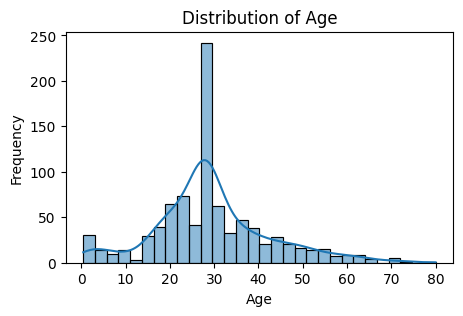

In [9]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df["Age"], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

* Here we can observe that the distribution of age is similar to Gaussian distribution (i.e. bell shaped curve) which is required.

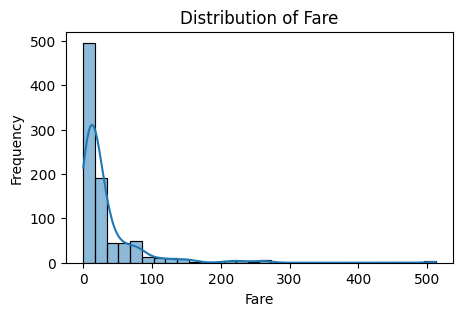

In [10]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df["Fare"], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

* Here we can observe that the distribution of Fare is skewed.

**Skewed Distribution**

* A skewed distribution is neither symmetric nor normal because the data values trail off more sharply on one side than on the other.

* If one tail is longer than another, the distribution is skewed. 

* A left-skewed distribution has a long left tail. 

* A right-skewed distribution has a long right tail. 

* Skewness can be observed using histogram or boxplot.

<div>
    <img src="assets/skewness.png" width=600 />
</div>

<div>
    <img src="assets/skewness_box_plot.png" width=600/>
</div>

* Skewness can corrected using transformations to make the data more normally distributed.

* Some common transformation are:
    * logarithmic transformation
    * square root transformation
    * cube root transformation
    * Box-Cox transformation

* Outliers can also skew the data. So, outliers removal can also solve the skewness.

* The skewness value should be within the range of -1 to 1 for a normal distribution, any major changes from this value may indicate the presence of outliers.

In [11]:
print("Skewness value of Fare: ", df["Fare"].skew())
print("Skewness value of Age: ", df["Age"].skew())

Skewness value of Fare:  4.787316519674893
Skewness value of Age:  0.5102446555756495


* Here we can see Age is normally distributed but Fare is positively skewed.

* Let's apply log transformation to Fare and create a new column as "Fare_log".

Skewness value of Fare:  0.3949280095189306


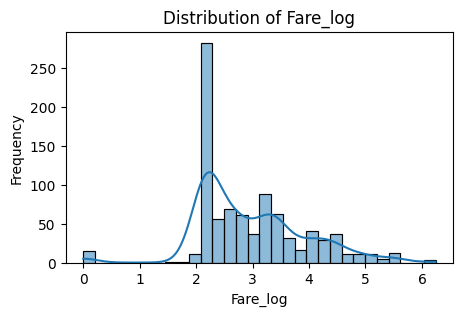

In [12]:
# Log transformation
df["Fare_log"] = np.log1p(df["Fare"])
print("Skewness value of Fare: ", df["Fare_log"].skew())

# Plotting the distribution of the transformed variable
plt.figure(figsize=(5, 3))
sns.histplot(data=df["Fare_log"], bins=30, kde=True)
plt.title('Distribution of Fare_log')
plt.xlabel('Fare_log')
plt.ylabel('Frequency')
plt.show()


**Visualizing Distribution of Categorical Variables**

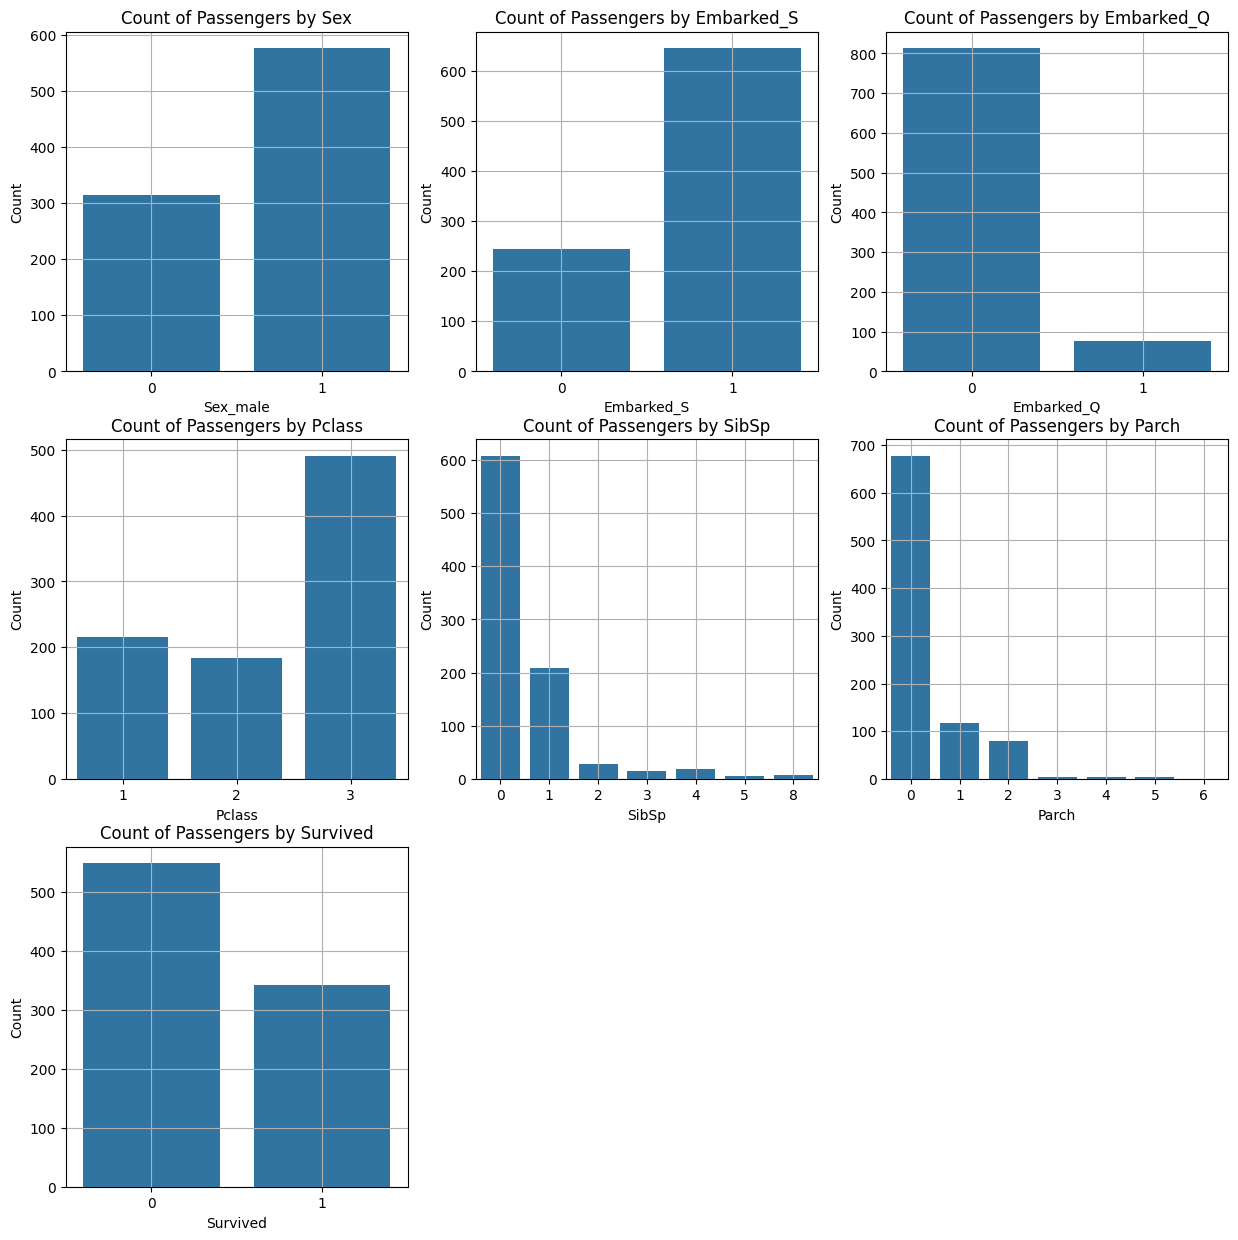

In [13]:
plt.figure(figsize=(15, 15))

# Distribution of 'Sex'
plt.subplot(3, 3, 1)
sns.countplot(x='Sex_male', data=df)
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex_male')
plt.ylabel('Count')
plt.grid(True)

# Distribution of 'Embarked_S'
plt.subplot(3, 3, 2)
sns.countplot(x='Embarked_S', data=df)
plt.title('Count of Passengers by Embarked_S')
plt.xlabel('Embarked_S')
plt.ylabel('Count')
plt.grid(True)

# Distribution of 'Embarked_Q'
plt.subplot(3, 3, 3)
sns.countplot(x='Embarked_Q', data=df)
plt.title('Count of Passengers by Embarked_Q')
plt.xlabel('Embarked_Q')
plt.ylabel('Count')
plt.grid(True)

# Distribution of 'Pclass'
plt.subplot(3, 3, 4)
sns.countplot(x='Pclass', data=df)
plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(True)

# Distribution of 'SibSp'
plt.subplot(3, 3, 5)
sns.countplot(x='SibSp', data=df)
plt.title('Count of Passengers by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.grid(True)

# Distribution of 'Parch'
plt.subplot(3, 3, 6)
sns.countplot(x='Parch', data=df)
plt.title('Count of Passengers by Parch')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.grid(True)

# Distribution of 'Survived'
plt.subplot(3, 3, 7)
sns.countplot(x='Survived', data=df)
plt.title('Count of Passengers by Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**Bivariate Analysis**
* Examine the relationships between different variables using scatter plots, box plots, and correlation matrices.

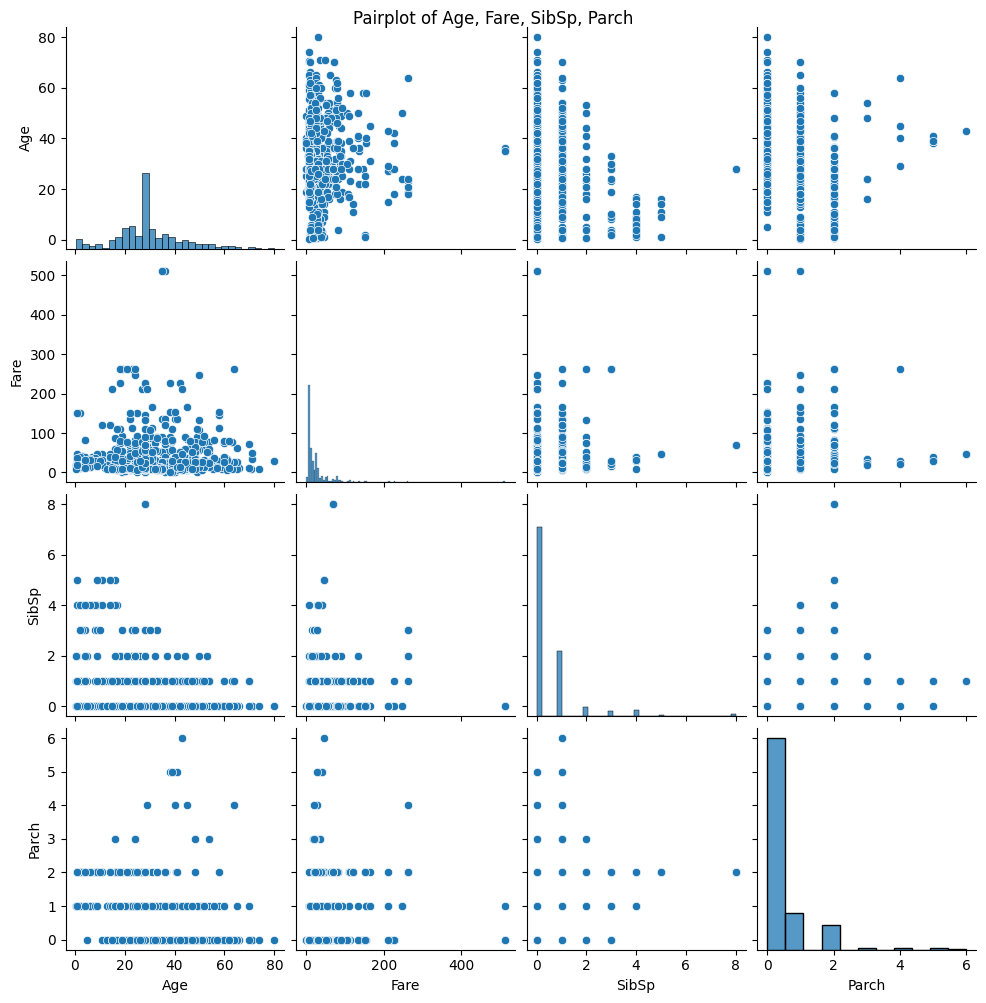

In [14]:
pairplot_columns = ['Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(df[pairplot_columns])
plt.suptitle("Pairplot of Age, Fare, SibSp, Parch", y=1.0)
plt.show()

* We can study correlation matrix to analyse the relationship between different variables.

In [ ]:
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* Our major objective of using Titanic Dataset is to figure out which passenger is most likely to survive. So, we are more interested in feature column: Survived.

* Let's see how different features affect the survial of passengers using scatterplots.

In [ ]:
# Survival Rate by Fare
plt.figure(figsize=(10, 6))
plt.scatter(df['Fare'], df['Survived'])
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

* We can see those who paid high fare, survived.

In [ ]:
# Survival Rate by Age
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Survived'])
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.grid()
plt.show()

* Here we can observe, almost all age group of passenger suvived and died. The 80 years old passenger survived.

**Box Plots**
* A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. 

* The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

 ![box_plot_summary](assets/box_plot_summary.png)

 * We use box plots for outlier detection.

In [ ]:
# Box plot for 'Age' column
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.grid()
plt.show()


In [ ]:
# Box plot for 'Fare' column
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.grid(True)
plt.show()

### **Outliers Treatment Methods**

1. Removal of Outliers
    * This method involves removing the outliers from the dataset.

    * Pros:
        * Simple to implement.
        * Removes extreme values that could distort analysis.
    * Cons:
        * Can lead to loss of data, especially if the dataset is small.
        * Risk of removing valid data points that are naturally extreme.

2. Capping Outliers
    * Replace outliers with a specified percentile value.

    * Pros:
        * Keeps all data points.
        * Reduces the effect of outliers without losing data.
    * Cons:
        * The choice of percentile is arbitrary and may not always be optimal.

3. Transformation
    * Apply transformations like logarithmic, square root, or Box-Cox to reduce the impact of outliers.

    * Pros:
        * Effective for right-skewed distributions.
        * Can normalize the data.
    * Cons:
        * Not suitable for all types of data.
        * Log transformation is not defined for zero or negative values.

4. Imputation
    * Replace outliers with mean, median, or mode.

    * Pros:
        * Simple to implement.
        * Retains all data points.
    * Cons:
        * Can introduce bias if outliers are numerous.
        * Not suitable if outliers contain valuable information. 
        
5. Z-Score Method
    * Identify and remove outliers based on the standard deviation from the mean.

    * Data points with a Z-score greater than a specified threshold (typically 3 or -3) are considered outliers.

    * Pros:
        * Effective for normally distributed data.
        * Data-driven approach.
    * Cons:
        * Not suitable for non-normal distributions.

In [ ]:
#1. Removal of outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

columns_to_check = ['Age', 'Fare', 'SibSp', 'Parch']
filtered_df = df.copy()

for column in columns_to_check:
    filtered_df = remove_outliers(filtered_df, column)
    
print("Filtered Data Shape After Outlier Removal: ", filtered_df.shape)

# Visualization of box plot before and after outlier treatment
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["Fare"])
plt.title('Boxplot of Fare Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["Fare"])
plt.title('Boxplot of Fare After Outlier Removal')
plt.show()

In [ ]:
# 2. Capping of outliers
def cap_outliers(df, column):
    lower_bound = df[column].quantile(0.01)
    upper_bound = df[column].quantile(0.99)
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

columns_to_check = ['Age', 'Fare', 'SibSp', 'Parch']
filtered_df = df.copy()

for column in columns_to_check:
    filtered_df = cap_outliers(filtered_df, column)
    
print("Filtered Data Shape After Outlier Capping: ", filtered_df.shape)
# Visualization of box plot before and after outlier treatment
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["Fare"])
plt.title('Boxplot of Fare Before Outlier Capping')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["Fare"])
plt.title('Boxplot of Fare After Outlier Capping')
plt.show()

In [ ]:
# 3. Log transformation
df["Fare_log"] = np.log1p(df["Fare"])

# Plotting the distribution of the transformed variable
# Visualization of box plot before and after outlier removal
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["Fare"])
plt.title('Boxplot of Fare Before transformation')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["Fare_log"])
plt.title('Boxplot of Fare After transformation')
plt.show()

In [ ]:
# 4. Median Imputation
# Replace outliers with median
def impute_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

columns_to_check = ['Age', 'Fare', 'SibSp', 'Parch']
filtered_df = df.copy()

for column in columns_to_check:
    filtered_df = impute_outliers(filtered_df, column)

# Visualization of box plot before and after outlier treatment
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["Fare"])
plt.title('Boxplot of Fare Before Median Imputation')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["Fare"])
plt.title('Boxplot of Fare After Median Imputation')
plt.show()

In [ ]:
# 5. Z-score method for outlier removal

def calculate_z_scores(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    z_scores = ((df[column] - mean) / std_dev).abs()
    return z_scores

columns_to_check = ['Age', 'Fare', 'SibSp', 'Parch']
filtered_df = df.copy()
threshold = 3
for column in columns_to_check:
    z_scores = calculate_z_scores(filtered_df, column)
    filtered_df = filtered_df[z_scores < threshold]
    
print("Filtered Data Shape After Outlier Capping: ", filtered_df.shape)
# Visualization of box plot before and after outlier treatment
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(data=df["Fare"])
plt.title('Boxplot of Fare Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=filtered_df["Fare"])
plt.title('Boxplot of Fare After Outlier Removal Using Z-Scores')
plt.show()